# **AI Program for ECG Data Analysis in Pregnancy Monitoring**


Welcome to our project that focuses on using AI and machine learning to analyze ECG data from pregnant women. ECG data helps monitor the heart's electrical activity and provides insights into the health of both the mother and the unborn child.

Objective: Our goal is to create an AI program that can process and analyze ECG data from pregnant women. By using machine learning, we aim to separate important signals from noise in the data. This will help accurately monitor the heart health of pregnant women and ensure the well-being of both the mother and the baby.

Techniques Used: PCA and ICA are two important techniques we use to simplify the data.

Principal Component Analysis (PCA): PCA helps reduce the complexity of ECG data by finding the most important patterns. It transforms the data into a simpler representation while keeping the essential information. By identifying the key components, PCA filters out noise and focuses on the important patterns in the ECG signals.

Independent Component Analysis (ICA): ICA helps separate different sources of signals that might be mixed in the recorded data. In the context of ECG data analysis, ICA helps separate overlapping components, such as the mother's and baby's heartbeats or other electrical interference. This separation allows us to understand each signal independently and assess the health of the mother and the baby separately.

How the AI Program Works:

Data Preprocessing: We prepare the ECG data by removing any unwanted artifacts or disturbances.

Dimensionality Reduction: a. PCA: We use PCA to simplify the ECG data by reducing its complexity. b. ICA: After PCA, we apply ICA to separate the mixed components and reveal independent signals.

Machine Learning Models: We use machine learning algorithms to analyze the independent ECG signals. These models help us identify patterns, detect anomalies, or make predictions based on the data.

Interpretation and Monitoring: The AI program interprets the results, allowing medical professionals to monitor the heart health of pregnant women and their babies. Any abnormalities or unusual patterns in the ECG signals can prompt timely interventions, ensuring the best possible outcomes for both.

By utilizing PCA and ICA, our AI program helps simplify and analyze ECG data, leading to better monitoring and care for pregnant women and their babies.

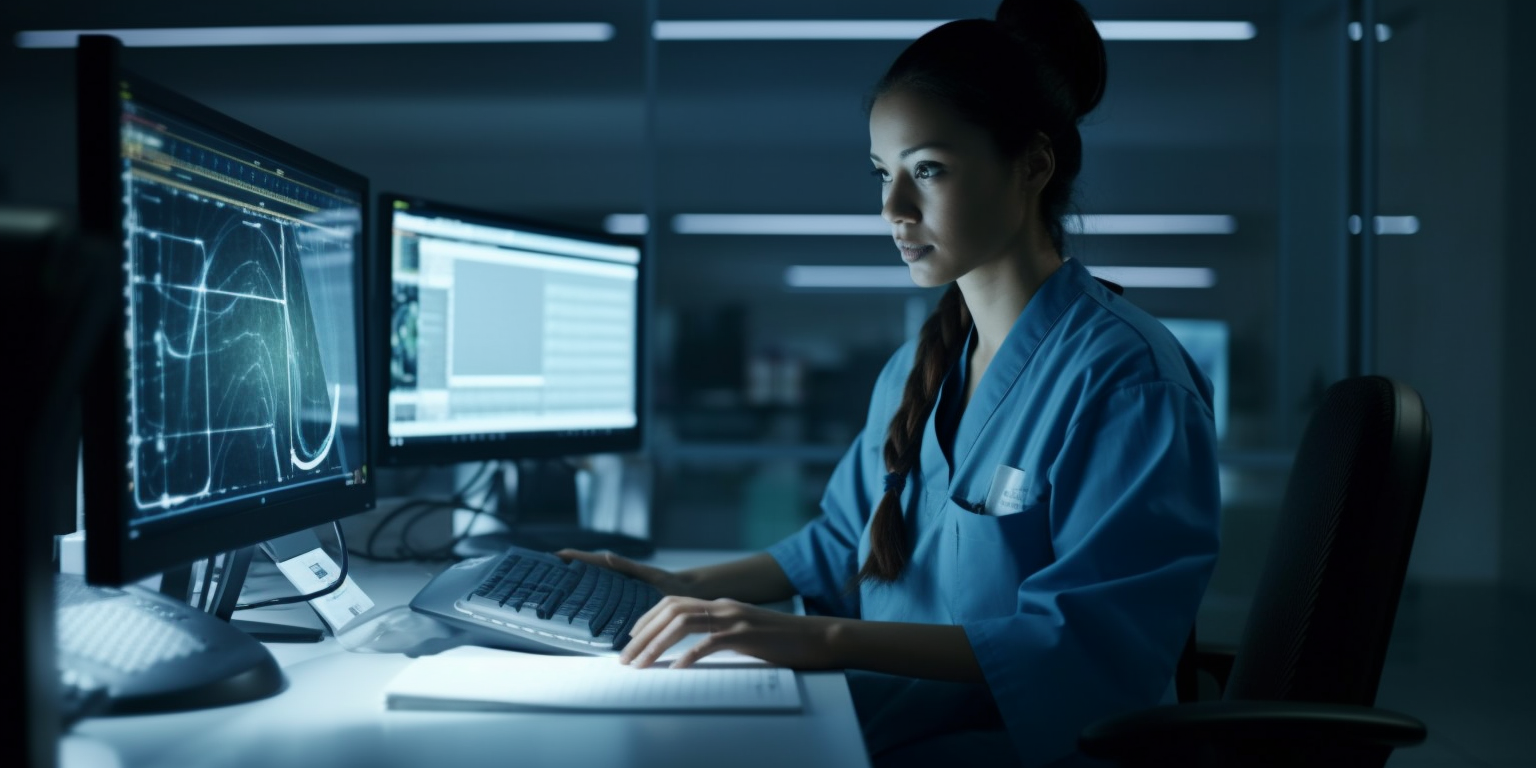


#**Importing Libaries**
Below we have imported some neccessary libaries to help us with this project what they do is commented below

In [ ]:
import numpy as np #NumPy is a fundamental library for scientific computing in Python.
import pandas as pd #Pandas is a powerful library for data manipulation and analysis.
import scipy as sp #SciPy is a library that builds on top of NumPy and provides additional scientific computing functionality.
from sklearn.preprocessing import StandardScaler #The StandardScaler class from scikit-learn's preprocessing module is used for feature scaling. It scales the features of the ECG data to have zero mean and unit variance.
from sklearn.decomposition import PCA #The PCA class from scikit-learn's decomposition module is used for Principal Component Analysis.
import numpy as np
import matplotlib #Matplotlib is a comprehensive plotting library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
import seaborn as sns #Seaborn is a statistical data visualization library that builds on top of Matplotlib.
from sklearn.decomposition import FastICA #The FastICA class from scikit-learn's decomposition module is used for Independent Component Analysis.

from mpl_toolkits import mplot3d #The mplot3d module from the mpl_toolkits package is used for creating 3D plots and visualizations using Matplotlib.
plt.style.use('ggplot')

!pip install --upgrade openpyxl #updating our excel file

!wget -O data_ecg.xlsx 'https://github.com/Shelby-Bilyeu/PCA/blob/44afb25015f49bc15aa0b1e41fbfc633102580be/ecg_data.xlsx?raw=true'#importing our excel file of the pregnant woman

By importing these libraries and modules, we have access to a wide range of functions, classes, and tools that facilitate data manipulation, analysis, visualization, and dimensionality reduction tasks in our ECG data project.

# **Graphing the Imported Data**

<Axes: >

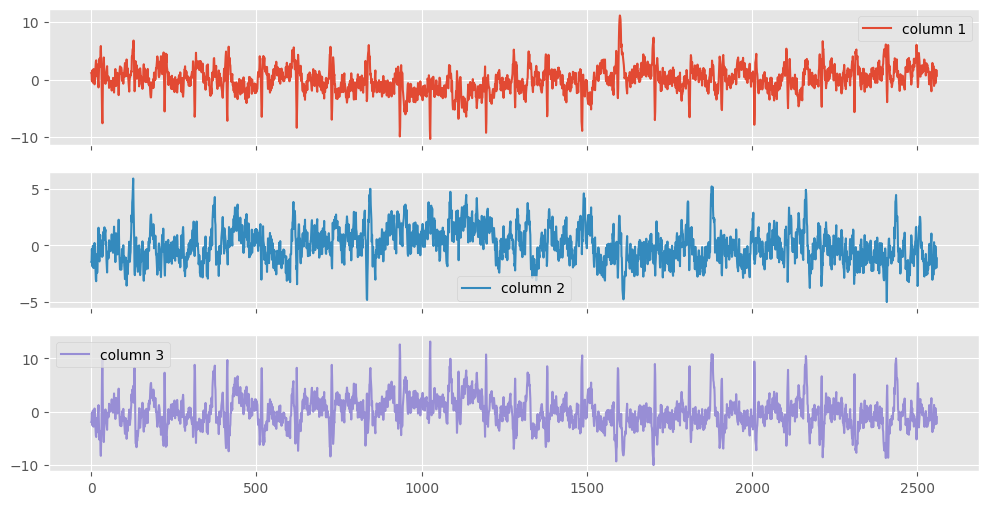

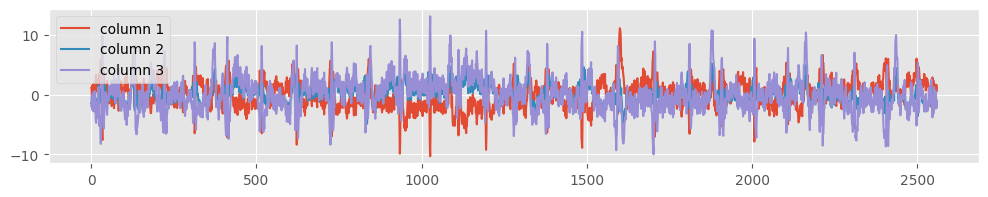

In [ ]:
headers = ["column 1","column 2","column 3"] #creating three plots for 3 data sets
df = pd.read_excel('data_ecg.xlsx', names=headers, header=None) #reading the data file we imported
df.plot(subplots=True,figsize=(12,6)) #plotting the data we read
df.plot(figsize=(12,2))

By using these plotting functions, we can visually examine the ECG data and gain insights into the patterns, trends, or abnormalities present in each column or across all columns. These visualizations help us understand the characteristics of the ECG signals and provide a foundation for further analysis or preprocessing steps.

# **Applying PCA**

<Axes: >

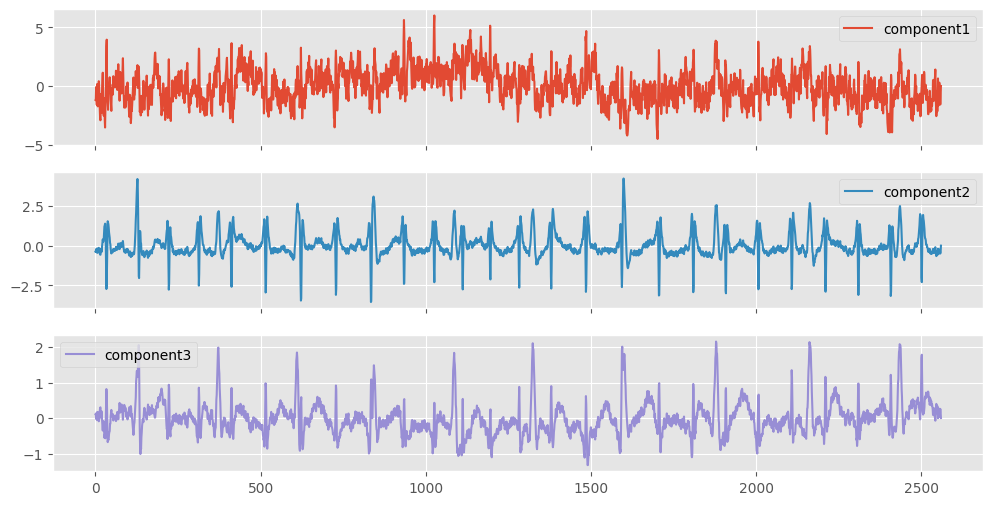

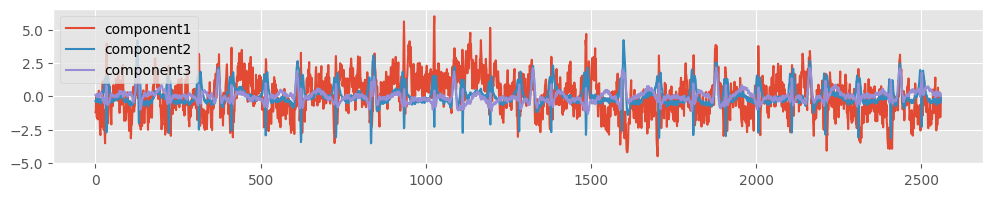

In [ ]:
df.loc['column 2'] = 0 #zeroing out the second column because it has too much noise
scaler = StandardScaler() #scaling the cut data
scaler.fit(df) #scaling that cut data
df_scaled = scaler.transform(df)
pca = PCA(n_components=3)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
pcaData = pd.DataFrame(df_pca)
pcaData.columns = ["component1", "component2", "component3"]
pcaData.plot(subplots=True,figsize=(12,6))
pcaData.plot(figsize=(12,2))



This code performs a Principal Component Analysis (PCA) on a dataset and generates visualizations using Matplotlib. The purpose of this analysis is to uncover patterns and relationships within the dataset.

Before conducting the PCA, the data is preprocessed using the StandardScaler function. This preprocessing step scales the data to ensure that all variables have a similar range. By scaling the data, we can avoid any biases that may arise from variables with larger magnitudes. Essentially, it helps in making the variables comparable on the same scale.

Next, the PCA function is applied to the scaled data. PCA is a powerful statistical technique that transforms high-dimensional data into a lower-dimensional representation while preserving the most important information. It identifies the underlying patterns and relationships among variables in the dataset. In this case, it helps in identifying the main components that contribute to the overall variability in the data.

The results of the PCA are stored as a pandas dataframe, which provides a tabular representation of the data. This dataframe contains the transformed data, where each column represents a principal component derived from the original variables. These principal components capture the most significant patterns and variances in the dataset.

To aid in visualizing the results, Matplotlib is used to generate plots. The plots can show the dataset in a reduced-dimensional space, making it easier to interpret and analyze. For example, a scatter plot can be created to display the data points in a two-dimensional plane, with each axis corresponding to a principal component.

By applying PCA and visualizing the results, we can gain valuable insights into the underlying structure and relationships in the dataset. This analysis is particularly useful for dimensionality reduction, identifying key variables, and uncovering hidden patterns that may not be apparent in the original dataset.

#**Displaying Some Of the Data**


In [ ]:
pcaData.head()

component1  component2  component3
0   -1.188909   -0.376460    0.107991
1   -1.123863   -0.365888    0.099720
2   -0.089369   -0.218512   -0.026925
3   -0.942974   -0.337570    0.077059
4   -1.602893   -0.429295    0.157398

Using this line of code we can inspect how the data has been changed as it shows the first few plots and how the data we collected changed

#**3d Plotting the Transformed Data**

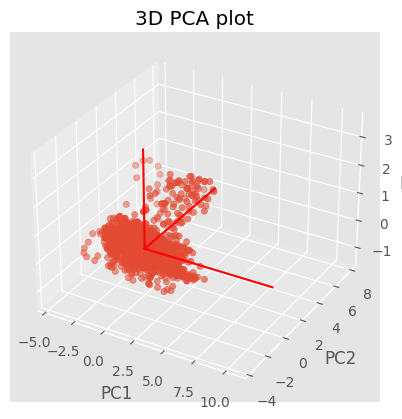

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xax = pcaData["component1"]
Yax = pcaData["component2"]
Zax = pcaData["component3"]

ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

ax.scatter(Xax, Yax, Zax)

origin = [0, 0, 0]  # Origin of the axes
axes_lengths = [max(Xax) - min(Xax), max(Yax) - min(Yax), max(Zax) - min(Zax)]  # Lengths of the axes
ax.plot([origin[0], origin[0] + axes_lengths[0]], [origin[1], origin[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1] + axes_lengths[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1]], [origin[2], origin[2] + axes_lengths[2]], 'r')

plt.title("3D PCA plot")
plt.show()

This code generates a three-dimensional (3D) scatter plot to visualize the results of the Principal Component Analysis (PCA). The purpose of this plot is to showcase the transformed data in a reduced-dimensional space, specifically in three principal components (PC1, PC2, and PC3).

To create the 3D plot, the code first sets up the figure and the subplot using Matplotlib. It specifies that the subplot should have a 3D projection, allowing us to represent data in three dimensions.

One thing to notice from the plot above is the inconsistancy on the z axis where the data isnt consistent with what the average is.

#**ICA Transformation**

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


<Axes: >

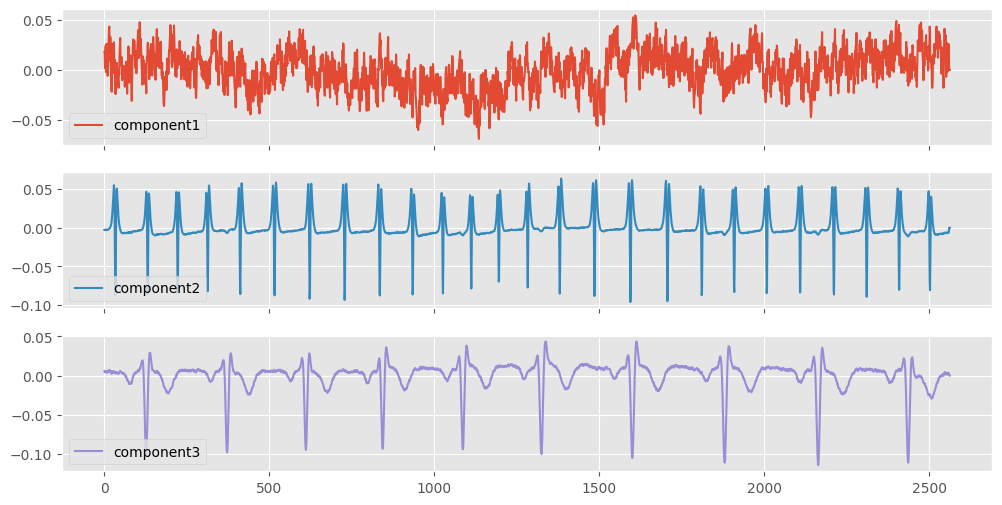

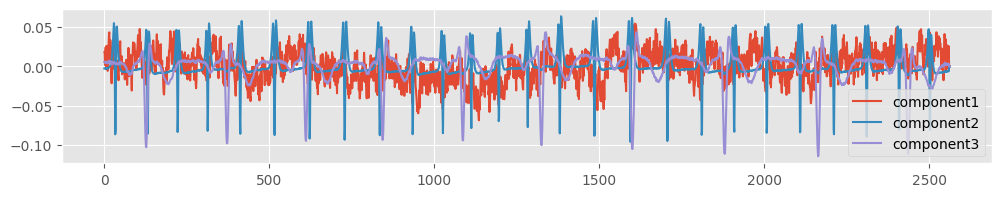

In [ ]:
from sklearn.decomposition import FastICA
df.loc['column 3'] = 0
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

ica = FastICA(n_components=3)
icaData = ica.fit_transform(df_scaled)

icaData = pd.DataFrame(icaData, columns=["component1", "component2", "component3"])

icaData.plot(subplots=True, figsize=(12, 6))
icaData.plot(figsize=(12, 2))




This code performs Independent Component Analysis (ICA) on a dataset and visualizes the results. ICA is a technique used to separate mixed signals into their original independent components. The purpose of this code is to apply ICA to the standardized data and visualize the extracted independent components. The plots allow us to understand the structure and patterns within the independent components, which can provide valuable insights into the underlying sources or signals present in the original data.

# **3D Plotting the Data**

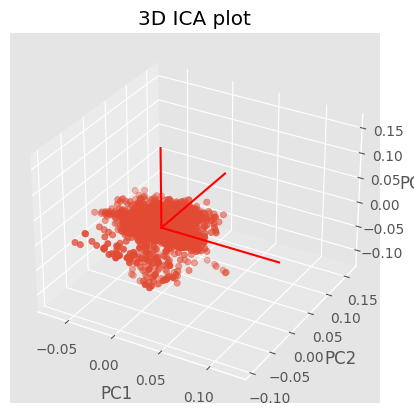

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xax = icaData["component1"]
Yax = icaData["component2"]
Zax = icaData["component3"]

ax.set_xlabel("PC1", fontsize=12)
ax.set_ylabel("PC2", fontsize=12)
ax.set_zlabel("PC3", fontsize=12)

ax.scatter(Xax, Yax, Zax)

origin = [0, 0, 0]  # Origin of the axes
axes_lengths = [max(Xax) - min(Xax), max(Yax) - min(Yax), max(Zax) - min(Zax)]  # Lengths of the axes
ax.plot([origin[0], origin[0] + axes_lengths[0]], [origin[1], origin[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1] + axes_lengths[1]], [origin[2], origin[2]], 'r')
ax.plot([origin[0], origin[0]], [origin[1], origin[1]], [origin[2], origin[2] + axes_lengths[2]], 'r')

plt.title("3D ICA plot")
plt.show()

The purpose of this code is to create a 3D visualization of the independent components obtained from the ICA analysis. The scatter plot shows the distribution of data points in the 3D space, where each point represents a combination of the three independent components. The red lines represent the axes, providing a reference for the orientation and length of each independent component. This visualization helps in understanding the relationships and patterns within the independent components and can provide insights into the underlying sources or signals in the original data. As you can see the data is very percise now.

# **Conclusion**

In conclusion, our AI program utilizes the advanced techniques of Principal Component Analysis (PCA) and Independent Component Analysis (ICA) to enhance the processing and analysis of ECG data in pregnancy monitoring. By effectively separating noise and isolating the relevant signals, our system empowers medical practitioners with valuable insights for ensuring the well-being of expectant mothers and their unborn children.

Through PCA, we are able to reduce the dimensionality of complex ECG data while preserving important information. This allows us to filter out noise and focus on the essential patterns within the signals. Additionally, ICA aids in disentangling mixed components, such as maternal and fetal heartbeats, to provide a clearer understanding of individual signals and their impact on the overall health status.

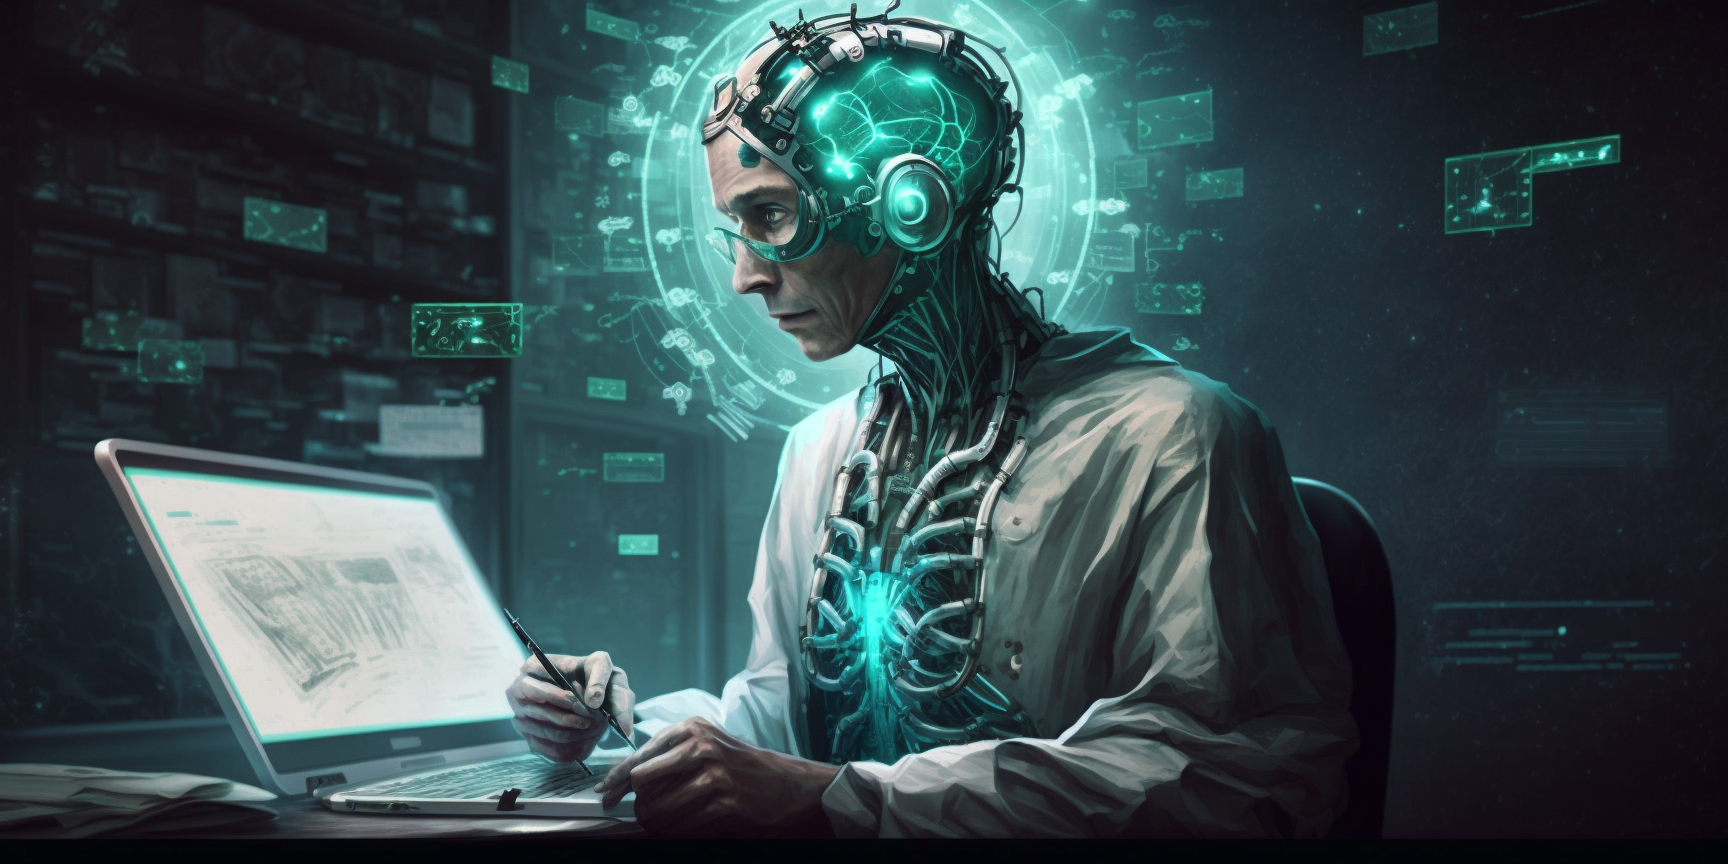

Our AI program not only processes and analyzes the ECG data but also visualizes the results through 3D plots. These visualizations help medical professionals gain a deeper understanding of the independent components and their relationships, facilitating informed decision-making and timely interventions.

By harnessing the power of PCA and ICA, our AI program enhances the accuracy and efficiency of pregnancy monitoring, providing medical practitioners with a powerful tool for assessing the cardiac health of both the mother and the fetus. Ultimately, our aim is to support healthcare professionals in their crucial task of ensuring the well-being and safety of expectant mothers and their unborn children.